# Example Execution and Validation of nuc_syndat Package

The purpose of the nuc_syndat package is to generate synthetic experimental neutron cross section data for incident neutron energies corresponding to the Resolved Resonance Range. The purpose of this synthetic data is to be used as training data for a set of algorithms (ATARI) that help automate a large portion of the evaluation process.

This package was developed as a part of Noah Walton's<sup>1</sup> disseration work in collaboration with Jesse Brown<sup>2</sup> and Vladimir Sobes<sup>1</sup>.


<sup>1</sup> The University of Tennessee </br>
<sup>2</sup> Oak Ridge National Lab

# Import Modules

Please note that this ipython notebook was written to work with the jupyter extension within vscode, if running this in a jupyter notbook, the magic matplotlib backend should be changed from "%matplotlib widget" to "%matplotlib notebook"

In [1]:

import numpy as np
from matplotlib.pyplot import *
import syndat
import pandas as pd
import os

/Users/noahwalton/Documents/GitHub/nuc_syndat/syndat/scattering_theory.py:165: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(orbital_angular_momentum == 0, "Phase shift function in syndat.scattering theory needs to be updated for higher-order waveforms")


In [2]:
%matplotlib widget

# Generation/reduction methodology

The evaluation process takes reduced experimental data and fits an experimentally corrected theoretical model to that data. We will call this the evaluation point or evaluation object. For now, it is assumed that the theoretical model can be statistically generated such that the output cross section is a potential realization of the true cross section, just not the realization of the true cross section that is observed in our world (or perhaps there is a very very small probability that the same exact realization is statistically generated as is observed). Because this evaluation object is directly compared to the reduced experimental data, if we assume we have the true theoretical model, we can assume we have the true set of reduced experimental data with zero noise and zero uncertainty. 

write about the generation or un-reduction process - open count rate data is pulled from RPI experiment

write about the noise/uncertainty addition and reduction process

A more in depth discussion of the methodology can be found in the article associated with this work. <a href="https://www.overleaf.com/read/gygkwfqyfpqv" target="_new">Walton, et al.</a>

In [3]:
sammy_directory =  os.path.realpath('../synthetic_data/Ta181')

opendata = os.path.join(sammy_directory,'rpi-open-ta181.csv')
sammy_xs = os.path.join(sammy_directory,'SAMMY.LST')


In [4]:
# generation/reduction options
perform_methods = True
add_noise = True
default_exp = True

gen = syndat.generation(perform_methods, default_exp, add_noise, opendata, sammy_xs)
red = syndat.reduction(perform_methods, gen)

AttributeError: module 'syndat' has no attribute 'generation'

# Look at the synthetic data

The reduction object houses a lot of information:</br>
    - count rate data (with uncertainties) for sample in and sample out data </br>
    - transmission data with uncertainty, clean and noisey </br>
    - other things

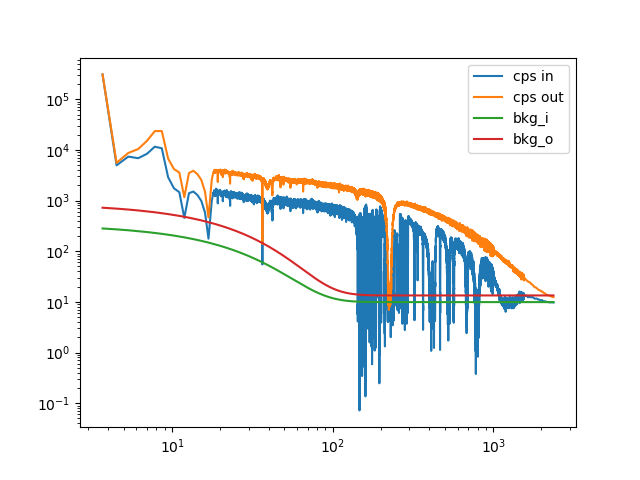

In [ ]:

trans = red.trans
cov = red.CovT
tof = red.trans.tof

figure()
plot(tof,red.sdat.cps, label='cps in'); 
plot(tof,red.odat.cps, label='cps out'); 
xscale('log'); yscale('log')
plot(tof, red.redpar.val.ks*red.Bi+red.redpar.val.b0s, label='bkg_i')
plot(tof, red.redpar.val.ko*red.Bi+red.redpar.val.b0o, label='bkg_o')
legend()

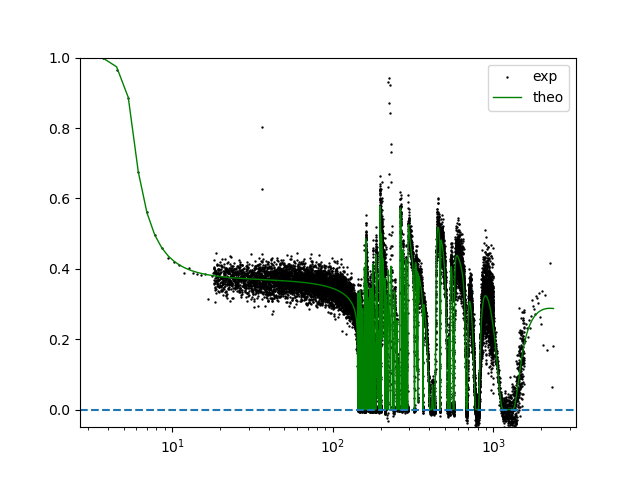

In [ ]:
figure()
scatter(tof,trans.expT, s=0.5, c='k', label='exp')
plot(tof,trans.theo, lw=1,c='g', label='theo')
legend()
xscale('log')
# xlim([1e2,1e3])
ylim([-0.05,1])
axhline(y=0.0, ls='--')
#yscale('log')
# show(); close()

# Verification of Synthetic data

If you run this process and do not add noise, you should get out the same cross section as you started with (within numerical precision). Set add_noise to False and run the following code:

In [ ]:
sum(abs(trans.theo-trans.expT))

676.4725938143819

# Checking Stability in SAMMY

If you take the synthetic experimental data and run it through SAMMY, it is able to perform the bayesian fitting procedure given the set of starting parameters (ENDF resonance parameters). The Posterior is slightly different due to the noise added, but the system is numerically stable through the bayesian update. Furthermore, the reduced experimental data and output from SAMMY can be compared to the real experimental data reduced and evaluated by Brown, J., et al.

The points in the total cross section that look out of place are a function of negative transmission values. The SAMMY code assigns an arbitrary value (~200 b) to cross section values when transmission goes negative because the alternative would go to infinity. This artifact is one of the reasons resonance parameters are fit to transmission rather than total cross section.

Text(0.5, 0.98, 'My Reduced Data')

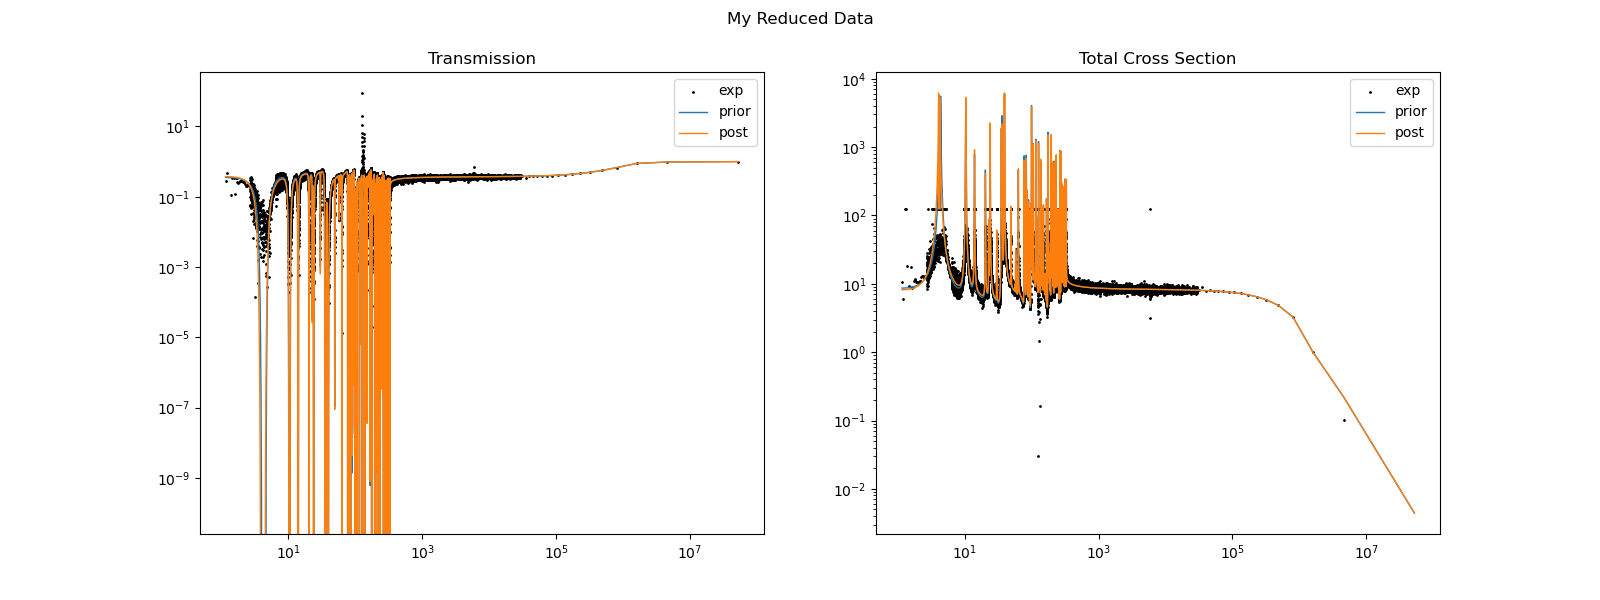

In [ ]:


lst = syndat.sammy_interface.readlst("/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/newdat/SAMMY.LST")

fig, ax = subplots(1,2, figsize=(16,6))
ax[0].scatter(lst.E, lst.exp_trans, s=1, c='k', label='exp')
ax[0].plot(lst.E, lst.theo_trans, lw=1, label='prior')
ax[0].plot(lst.E, lst.theo_trans_bayes, lw=1, label='post')
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Transmission')


ax[1].scatter(lst.E, lst.exp_xs, s=1, c='k', label='exp')
ax[1].plot(lst.E, lst.theo_xs, lw=1, label='prior')
ax[1].plot(lst.E, lst.theo_xs_bayes, lw=1, label='post')
ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_title('Total Cross Section')

fig.suptitle('My Reduced Data')


In [ ]:
sol_lst = syndat.sammy_interface.readlst("/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/newdat/SAMMY.LST")

Text(0.5, 0.98, 'Brown, J. Reduced Data')

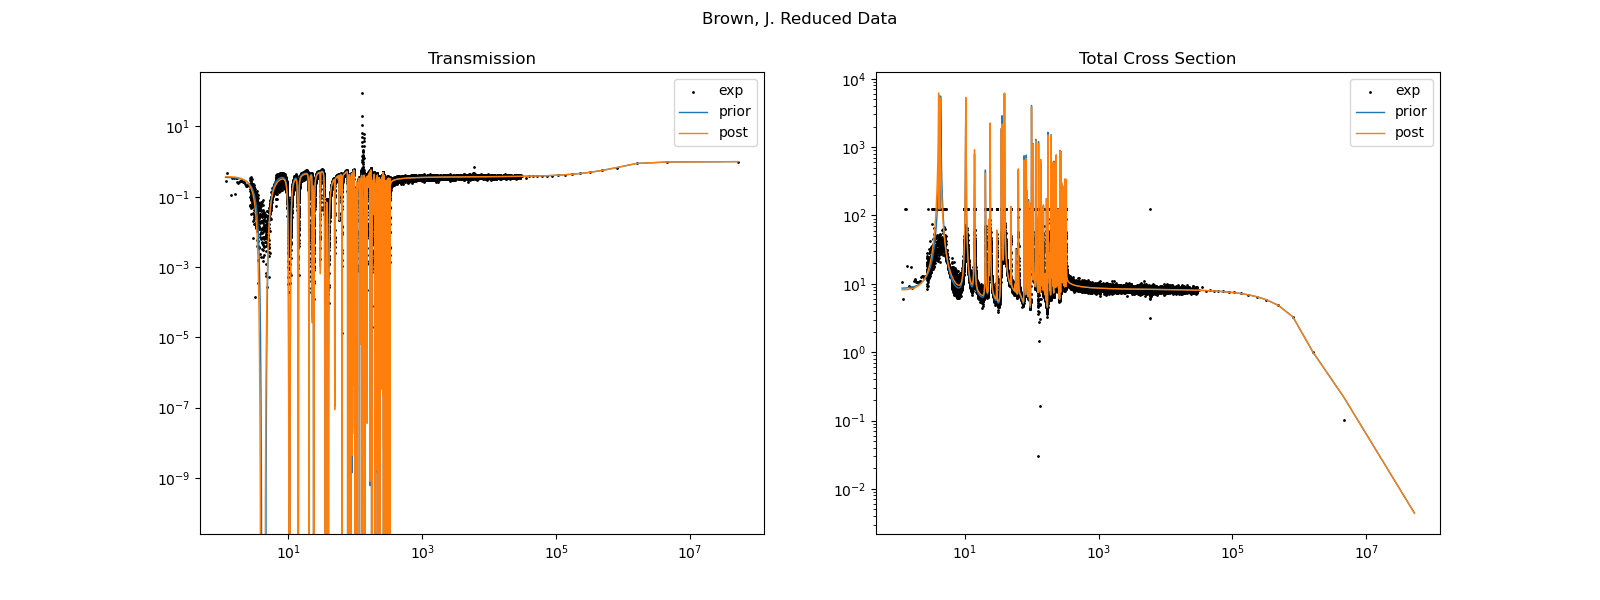

In [ ]:
fig, ax = subplots(1,2,figsize=(16,6))
ax[0].scatter(sol_lst.E, sol_lst.exp_trans, s=1, c='k', label='exp')
ax[0].plot(sol_lst.E, sol_lst.theo_trans, lw=1, label='prior')
ax[0].plot(sol_lst.E, sol_lst.theo_trans_bayes, lw=1, label='post')
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_title('Transmission')

ax[1].scatter(sol_lst.E, sol_lst.exp_xs, s=1, c='k', label='exp')
ax[1].plot(sol_lst.E, sol_lst.theo_xs, lw=1, label='prior')
ax[1].plot(sol_lst.E, sol_lst.theo_xs_bayes, lw=1, label='post')
ax[1].set_xscale('log'); ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_title('Total Cross Section')

fig.suptitle('Brown, J. Reduced Data')